Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск
1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

3. [опция]. Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [1]:
import numpy as np
from tqdm import tqdm
from copy import deepcopy
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
X, y = make_regression(n_samples=100,
                       noise = 10,
                       n_features = 1)

In [3]:
X.shape, y.shape

((100, 1), (100,))

In [4]:
# функция вычисления ошибки
def calc_mse(y, y_pred):
    err = np.mean(np.square(y - y_pred))
    return err

# функция вычисления весов
def calculate_predictions(w0, w1, X):
    return w0 + w1*X

# функция вычисления модели методом градиентного спуска
def fit_linear_model(X: np.array,
                     y: np.array,
                     alpha: float = 0.01,
                     iteration: int = 500,
                     hysteresis: float = 1e-5):
    weights = np.random.randn(X.shape[0])
    errors_history, weights_history, y_predication = [], [weights], []

    for iteration in range(iteration):
        y_pred = np.dot(weights, X)
        current_error = calc_mse(y, y_pred)
        weights = weights - 2*alpha*np.sum(X*(y_pred - y), axis=1)/len(y_pred)
        errors_history.append(current_error)
        weights_history.append(weights)
        y_predication.append(y_pred)

        if iteration > 2 and np.abs(current_error - errors_history[-2]) < hysteresis:
            break
        
    return weights, weights_history, errors_history, y_predication

In [5]:
# функция вычисления модели методом стохастического градиентного спуска
def calculate_predictions(theta0, theta1, X):
    return theta0 + theta1*X
    

def calculate_cost(theta0, theta1, X, y):
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))

    y_pred = calculate_predictions(theta0, theta1, X)
    cost = np.average((y - y_pred)**2, axis=2)/2

    return cost


def gradient_descent_step(theta, X, y, learning_rate):
    n = len(y)
    y_pred = calculate_predictions(theta[0], theta[1], X)

    updated_theta = deepcopy(theta)
    updated_theta[0] -= learning_rate / n * np.sum((y_pred - y))
    updated_theta[1] -= learning_rate / n * np.sum((y_pred - y) * X)

    return updated_theta

In [6]:
# Обучение модели методом градиентного спуска
weights_GD, weights_history_GD, errors_history_GD, y_predication_GD = fit_linear_model(X,
                                                                                       y,
                                                                                       alpha = 0.0001, 
                                                                                       iteration = 10000)


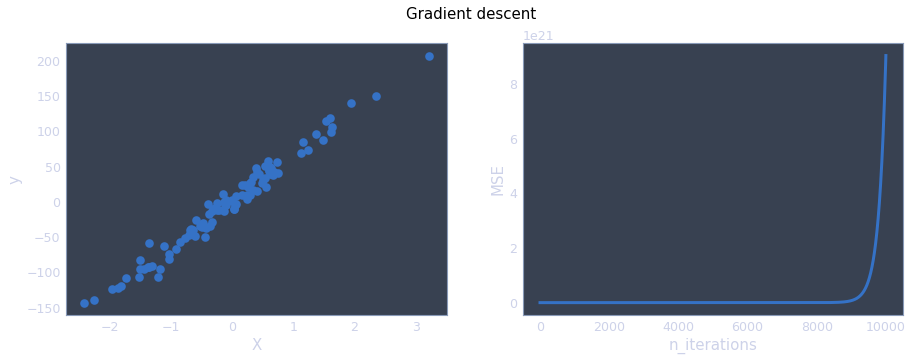

In [7]:
fig = plt.figure(figsize=(15, 5))
plt.suptitle(f"Gradient descent", size=15)
jtplot.style(theme = 'oceans16', gridlines = '--')
plt.subplot(121)
plt.scatter(X, y, linewidth=3)
plt.xlabel("X", size=15)
plt.ylabel("y", size=15)
plt.grid()
                    
plt.subplot(122)
plt.plot(errors_history_GD, linewidth=3)
plt.xlabel("n_iterations", size=15)
plt.ylabel("MSE", size=15)
plt.grid()


In [8]:
# Обучение модели методом стохастического градиентного спуска
n_iterations, learning_rate = 500, 0.001
theta_history, cost_history = [100*np.random.rand(2)], []

for it in tqdm(range(n_iterations)):
    idx = np.random.randint(0, len(y))
    last_theta = theta_history[-1]
    current_theta = gradient_descent_step(theta=last_theta, 
                                          X=X[[idx]], 
                                          y=y[[idx]], 
                                          learning_rate=learning_rate
    )
    theta_history.append(current_theta)
    cost_history.append(calculate_cost(current_theta[0], current_theta[1], X=X, y=y))


100%|██████████| 500/500 [00:00<00:00, 10609.95it/s]

[array([[ 2648.83421999, 10051.05796702, 11423.85821713,  7836.01527337,
         4304.81729939,  2355.05985114, 12463.43778916,  3690.29356666,
         5803.64100385,  3869.88182086, 18606.78438189, 18131.35085396,
         2225.9484515 , 11802.21021965,  5353.21952489,  5967.93162151,
        23576.2721745 ,  8926.32671171,  7573.33679686, 21399.68331057,
        10550.68141564,  9591.61322731,  4763.58375999, 29666.4610342 ,
         4725.23351178, 12712.88813812,  2502.18550234,  5042.02305236,
         7299.0409243 , 11354.72981967,  5103.19505759,  3587.32592612,
         2214.67307537,  6479.37813561, 24734.6237752 ,  2525.08456304,
         3119.56710938,  2192.18141721,  6555.79849732,  9229.62216549,
        12434.79197006, 11855.3162642 ,  2721.10966185, 11758.36132689,
         8516.11590917, 10843.92096721, 54044.39627671, 19592.33466064,
         4554.03679614,  3360.39773871,  2408.70137052,  7625.45150973,
         5727.51511797,  2255.50429774,  3731.60150703, 10607.4

(2500, 3500)

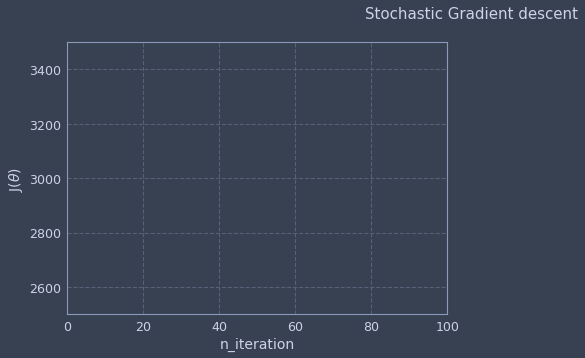

In [9]:
fig = plt.figure(figsize=(15, 5))
plt.suptitle(f"Stochastic Gradient descent", size=15)

plt.subplot(121)
plt.plot(cost_history[0], linewidth=3)
plt.xlabel("n_iteration", size=14)
plt.ylabel(r"J($\theta$)", size=14)
plt.xlim(0, 100) 
plt.ylim(2500, 3500)